<h2 align=center><font size = 5>Seattle Car Collision Severity Analysis</font></h2>

In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "Data-Collisions.csv" 
df_whole = pd.read_csv(filepath,low_memory=False)

In [3]:
df_whole.shape

(194673, 38)

In [4]:
df_whole.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
# check the data set summary, only 23 attributes are useful, so create a new dataframe
# 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','SDOT_COLCODE', 'SDOT_COLDESC',
df = df_whole[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']].copy()

df_map = df_whole[['SEVERITYCODE','ADDRTYPE','X', 'Y']].copy()


In [6]:
df.shape

(194673, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   ADDRTYPE        192747 non-null  object
 3   INCDATE         194673 non-null  object
 4   INCDTTM         194673 non-null  object
 5   JUNCTIONTYPE    188344 non-null  object
 6   INATTENTIONIND  29805 non-null   object
 7   UNDERINFL       189789 non-null  object
 8   WEATHER         189592 non-null  object
 9   ROADCOND        189661 non-null  object
 10  LIGHTCOND       189503 non-null  object
 11  SPEEDING        9333 non-null    object
 12  HITPARKEDCAR    194673 non-null  object
dtypes: int64(1), object(12)
memory usage: 19.3+ MB


## Identify and handle missing values

### identify missing data 
Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. 

In [8]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [9]:
df.isnull().head(6)

SEVERITYCODE  SEVERITYDESC  ADDRTYPE  INCDATE  INCDTTM  JUNCTIONTYPE  \
0         False         False     False    False    False         False   
1         False         False     False    False    False         False   
2         False         False     False    False    False         False   
3         False         False     False    False    False         False   
4         False         False     False    False    False         False   
5         False         False     False    False    False         False   

   INATTENTIONIND  UNDERINFL  WEATHER  ROADCOND  LIGHTCOND  SPEEDING  \
0            True      False    False     False      False      True   
1            True      False    False     False      False      True   
2            True      False    False     False      False      True   
3            True      False    False     False      False      True   
4            True      False    False     False      False      True   
5            True      False    False     False      False      True   

   HITPARKEDCAR  
0         False  
1         False  
2         False  
3         False  
4         False  
5         False

In [10]:
# Evaluating for Missing Data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
-----------------------------------
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
-----------------------------------
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
-----------------------------------
INCDATE
False    194673
Name: INCDATE, dtype: int64
-----------------------------------
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
-----------------------------------
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
-----------------------------------
INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
-----------------------------------
UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64
-----------------------------------
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
-----------------------------------
ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64
--------

#### Replace missing value by the most frequency:

In [11]:
# which values are present in a particular column, we can use the ".value_counts()" method: df['num-of-doors'].value_counts(), use the ".idxmax()" method to calculate for us the most common type automatically: df['ADDRTYPE'].value_counts().idxmax()
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [12]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    96138
At-Intersection                            64908
Mid-Block (but intersection related)       22790
RampDriveway                               10837
Name: JUNCTIONTYPE, dtype: int64

In [13]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [14]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear       116216
RainSnow     34815
Overcast     27719
Unknown      15923
Name: WEATHER, dtype: int64

In [15]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

In [16]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [17]:
# only has Y, so all the other value should be N
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     194673
unique         2
top            N
freq      164868
Name: INATTENTIONIND, dtype: object

In [18]:
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

count     194673
unique         2
top            N
freq      185340
Name: SPEEDING, dtype: object

In [19]:
df["SEVERITYDESC"].describe()

count                             194673
unique                                 2
top       Property Damage Only Collision
freq                              136485
Name: SEVERITYDESC, dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   SEVERITYDESC    194673 non-null  object
 2   ADDRTYPE        194673 non-null  object
 3   INCDATE         194673 non-null  object
 4   INCDTTM         194673 non-null  object
 5   JUNCTIONTYPE    194673 non-null  object
 6   INATTENTIONIND  194673 non-null  object
 7   UNDERINFL       194673 non-null  int64 
 8   WEATHER         194673 non-null  object
 9   ROADCOND        194673 non-null  object
 10  LIGHTCOND       194673 non-null  object
 11  SPEEDING        194673 non-null  object
 12  HITPARKEDCAR    194673 non-null  object
dtypes: int64(2), object(11)
memory usage: 19.3+ MB


#### Drop the whole row:

In [21]:
# simply drop whole row with NaN in "X" and "Y" column
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

(189339, 4)

#### Correct data format

Convert data types to proper format

In [22]:
df.dtypes

SEVERITYCODE       int64
SEVERITYDESC      object
ADDRTYPE          object
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
INATTENTIONIND    object
UNDERINFL          int64
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
HITPARKEDCAR      object
dtype: object

In [23]:
### Convert to date time object
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [24]:
# double check
df.dtypes

SEVERITYCODE                    int64
SEVERITYDESC                   object
ADDRTYPE                       object
INCDATE           datetime64[ns, UTC]
INCDTTM                datetime64[ns]
JUNCTIONTYPE                   object
INATTENTIONIND                 object
UNDERINFL                       int64
WEATHER                        object
ROADCOND                       object
LIGHTCOND                      object
SPEEDING                       object
HITPARKEDCAR                   object
dtype: object

In [25]:
# covert datetime to weekday and hours
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head(5)

SEVERITYCODE                    SEVERITYDESC      ADDRTYPE  \
0             2                Injury Collision  Intersection   
1             1  Property Damage Only Collision         Block   
2             1  Property Damage Only Collision         Block   
3             1  Property Damage Only Collision         Block   
4             2                Injury Collision  Intersection   

                    INCDATE             INCDTTM  \
0 2013-03-27 00:00:00+00:00 2013-03-27 14:54:00   
1 2006-12-20 00:00:00+00:00 2006-12-20 18:55:00   
2 2004-11-18 00:00:00+00:00 2004-11-18 10:20:00   
3 2013-03-29 00:00:00+00:00 2013-03-29 09:26:00   
4 2004-01-28 00:00:00+00:00 2004-01-28 08:04:00   

                              JUNCTIONTYPE INATTENTIONIND  UNDERINFL  \
0                          At-Intersection              N          0   
1  Mid-Block (not related to intersection)              N          0   
2  Mid-Block (not related to intersection)              N          0   
3  Mid-Block (not related to intersection)              N          0   
4                          At-Intersection              N          0   

    WEATHER ROADCOND        LIGHTCOND SPEEDING HITPARKEDCAR  hourofday  \
0  Overcast      Wet         Daylight        N            N         14   
1  RainSnow      Wet  Dark-With-Light        N            N         18   
2  Overcast      Dry         Daylight        N            N         10   
3     Clear      Dry         Daylight        N            N          9   
4  RainSnow      Wet         Daylight        N            N          8   

   dayofweek  
0          2  
1          2  
2          3  
3          4  
4          2

#### Binning

transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

<AxesSubplot:xlabel='X', ylabel='count'>

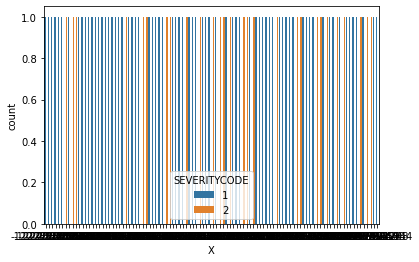

In [26]:
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [27]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

X X-binned
0 -122.323148   Medium
1 -122.347294   Medium
2 -122.334540   Medium
3 -122.334803   Medium
4 -122.306426   Medium
5 -122.387598      Low
6 -122.338485   Medium
7 -122.320780   Medium
8 -122.335930   Medium
9 -122.384700      Low

<AxesSubplot:xlabel='X-binned', ylabel='count'>

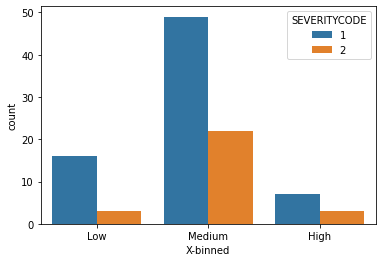

In [28]:
# plot with simple code, no title and other adjustment
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")

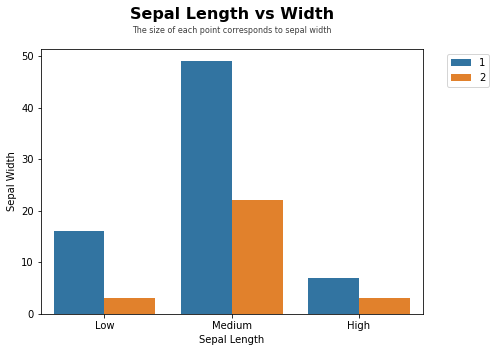

In [29]:
# plot
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE", ax=ax)

# make adjustments
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

#### Indicator variable (or dummy variable)

In [30]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

AddType-Block  AddType-Intersection
0              0                     1
1              1                     0
2              1                     0
3              1                     0
4              0                     1

In [31]:
# merge data frame "df" and "dummy_variable_1" 
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)
# drop original column "fuel-type" from "df"
# df.drop("fuel-type", axis = 1, inplace=True)

SEVERITYCODE      ADDRTYPE           X          Y X-binned  AddType-Block  \
0             2  Intersection -122.323148  47.703140   Medium              0   
1             1         Block -122.347294  47.647172   Medium              1   
2             1         Block -122.334540  47.607871   Medium              1   
3             1         Block -122.334803  47.604803   Medium              1   
4             2  Intersection -122.306426  47.545739   Medium              0   

   AddType-Intersection  
0                     1  
1                     0  
2                     0  
3                     0  
4                     1

### Analyzing Individual Feature Patterns using Visualization

In [32]:
df.describe()

SEVERITYCODE      UNDERINFL      hourofday      dayofweek
count  194673.000000  194673.000000  194673.000000  194673.000000
mean        1.298901       0.046853      11.167106       2.938728
std         0.457778       0.211324       7.075297       1.921549
min         1.000000       0.000000       0.000000       0.000000
25%         1.000000       0.000000       6.000000       1.000000
50%         1.000000       0.000000      12.000000       3.000000
75%         2.000000       0.000000      17.000000       5.000000
max         2.000000       1.000000      23.000000       6.000000

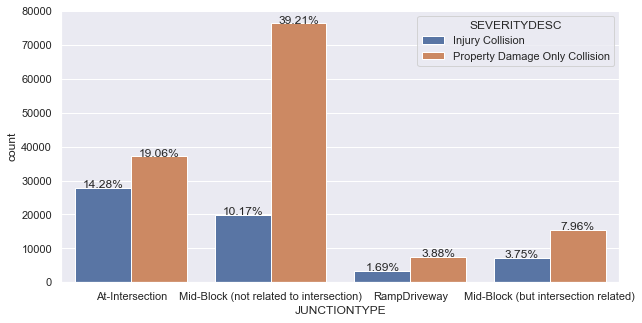

In [33]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

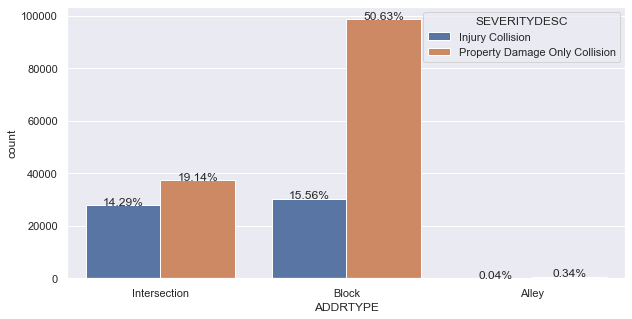

In [34]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

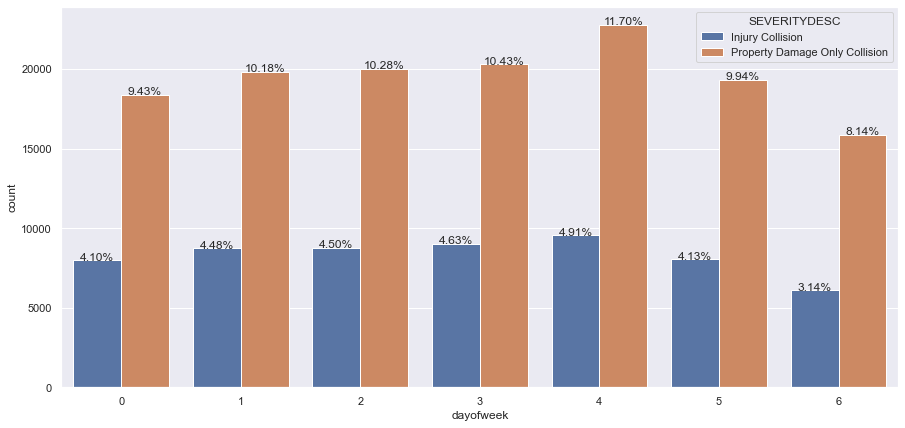

In [35]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

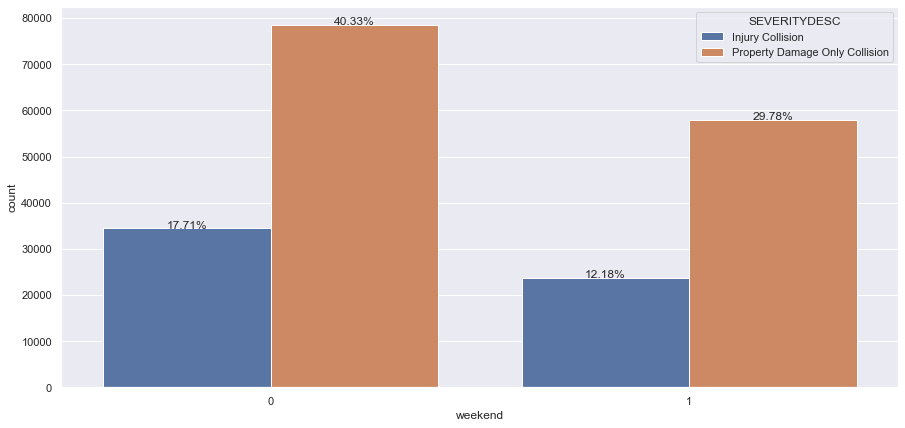

In [36]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

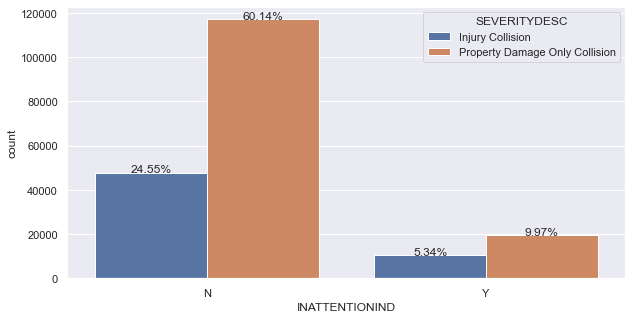

In [37]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

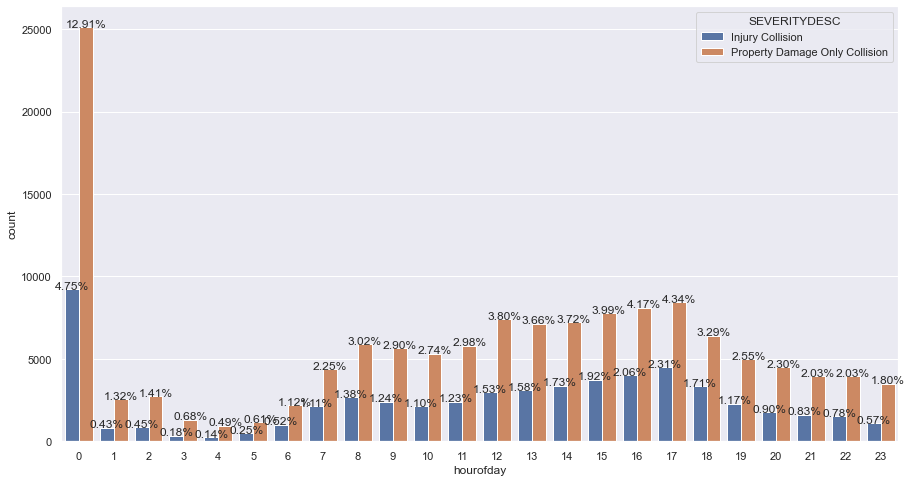

In [38]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

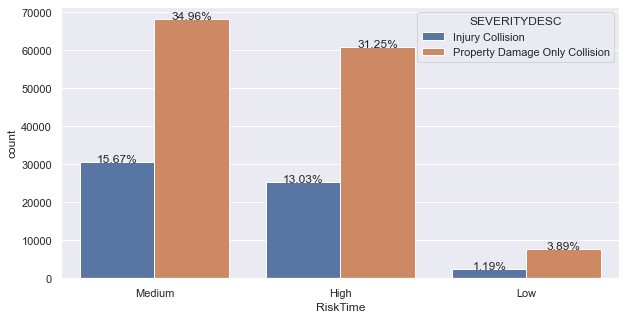

In [39]:
# High risk =1, relative ration > 3; Midum Risk = 0, for 2 > relative ration < 3; 
df['RiskTime'] = df['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

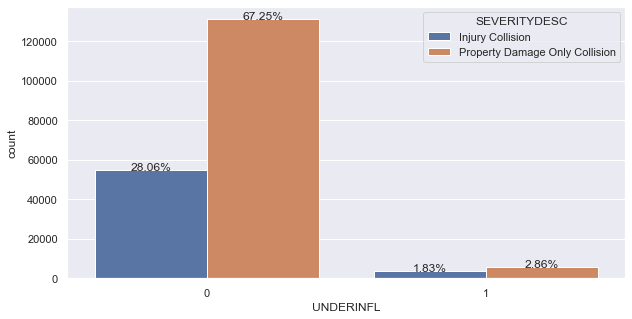

In [40]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

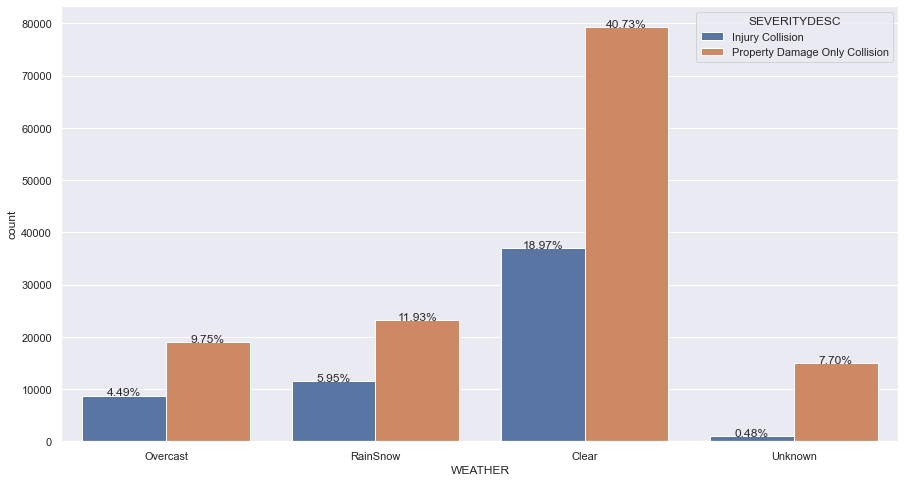

In [41]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

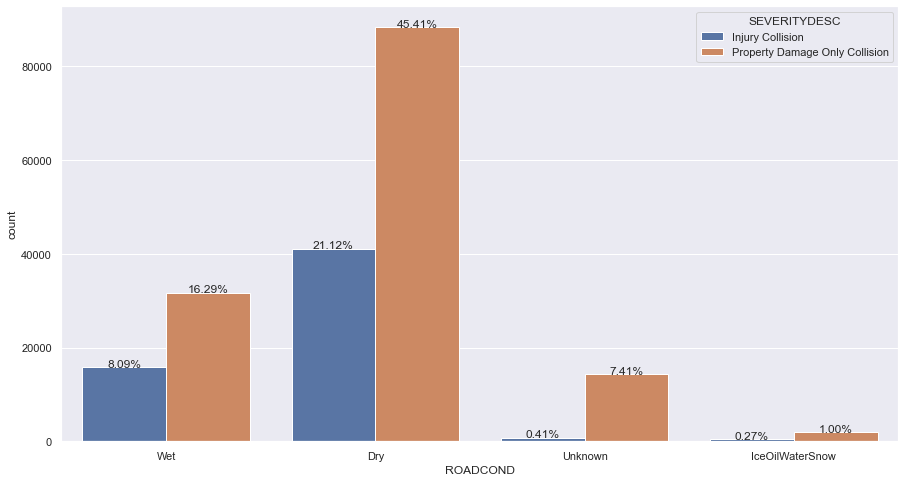

In [42]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

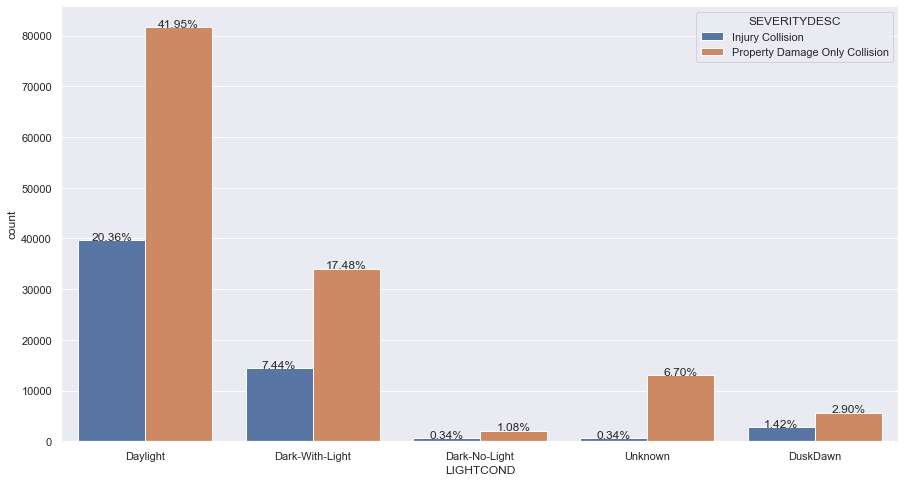

In [43]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

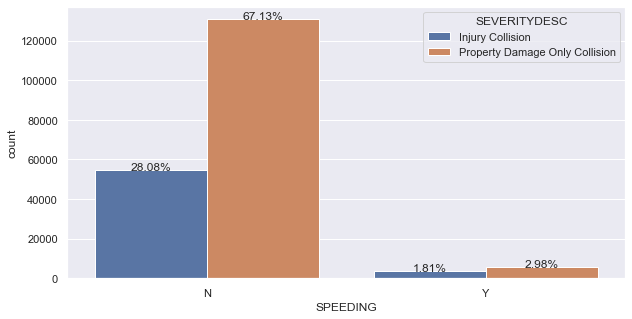

In [44]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

#### Continuous numerical variables and linear relationship

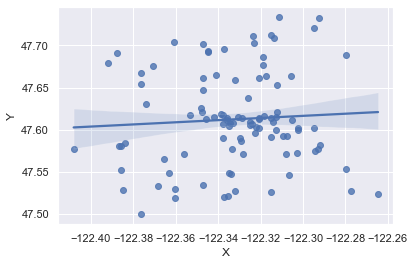

In [45]:
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

#### Categorical variables using boxplot

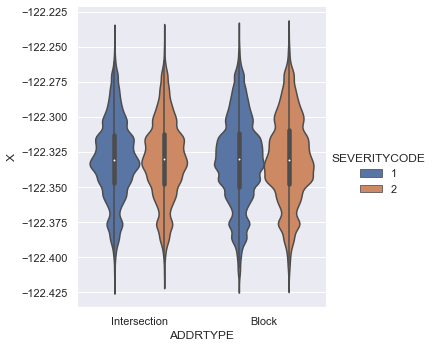

In [47]:
sns.catplot(x="ADDRTYPE", y="X", hue="SEVERITYCODE",data=df_map, kind="violin")
plt.show()

### Descriptive Statistical Analysis

In [48]:
# The default setting of "describe" skips variables of type object. 
df.describe(include=['object'])

SEVERITYDESC ADDRTYPE  \
count                           194673   194673   
unique                               2        3   
top     Property Damage Only Collision    Block   
freq                            136485   128852   

                                   JUNCTIONTYPE INATTENTIONIND WEATHER  \
count                                    194673         194673  194673   
unique                                        4              2       4   
top     Mid-Block (not related to intersection)              N   Clear   
freq                                      96138         164868  116216   

       ROADCOND LIGHTCOND SPEEDING HITPARKEDCAR RiskTime  
count    194673    194673   194673       194673   194673  
unique        4         5        2            2        3  
top         Dry  Daylight        N            N   Medium  
freq     129522    121307   185340       187457    98559

In [49]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

#### Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [50]:
df['ADDRTYPE'].unique() #ADDRTYPE	COLLISIONTYPE

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [51]:
# grouping results
df_gptest = df[['hourofday','ADDRTYPE','SEVERITYCODE']]
grouped_test1 = df_gptest.groupby(['hourofday','ADDRTYPE'],as_index=False).mean()
grouped_test1

hourofday      ADDRTYPE  SEVERITYCODE
0           0         Alley      1.124183
1           0         Block      1.216787
2           0  Intersection      1.391905
3           1         Alley      1.052632
4           1         Block      1.196220
..        ...           ...           ...
67         22         Block      1.215426
68         22  Intersection      1.415429
69         23         Alley      1.107143
70         23         Block      1.181984
71         23  Intersection      1.393468

[72 rows x 3 columns]

In [52]:
# This grouped data is much easier to visualize when it is made into a pivot table
grouped_pivot = grouped_test1.pivot(index='ADDRTYPE',columns='hourofday')
grouped_pivot

SEVERITYCODE                                                    \
hourofday              0         1         2         3         4         5    
ADDRTYPE                                                                      
Alley            1.124183  1.052632  1.040000  1.142857  1.000000  1.333333   
Block            1.216787  1.196220  1.198075  1.172387  1.181435  1.230241   
Intersection     1.391905  1.379157  1.379545  1.341463  1.370370  1.441296   

                                                      ...                      \
hourofday           6         7         8         9   ...        14        15   
ADDRTYPE                                              ...                       
Alley         1.333333  1.166667  1.096774  1.071429  ...  1.071429  1.136364   
Block         1.236817  1.241329  1.260768  1.225813  ...  1.252028  1.260887   
Intersection  1.470270  1.477636  1.415385  1.434524  ...  1.437236  1.443081   

                                                                          \
hourofday           16        17        18        19        20        21   
ADDRTYPE                                                                   
Alley         1.176471  1.031250  1.107143  1.166667  1.107143  1.047619   
Block         1.270599  1.280489  1.267129  1.237556  1.208039  1.219358   
Intersection  1.436065  1.464979  1.476082  1.459725  1.424631  1.428797   

                                  
hourofday           22        23  
ADDRTYPE                          
Alley         1.086957  1.107143  
Block         1.215426  1.181984  
Intersection  1.415429  1.393468  

[3 rows x 24 columns]

#### Correlation and Causation

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

#### ANOVA: Analysis of Variance

test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

## Map - Heatmap and other Map with number

In [53]:
# use X Y to form a Piont for maping
df_map["geom"] = df_map["Y"].map(str) + "," + df_map["X"].map(str)
df_map.head()

SEVERITYCODE      ADDRTYPE           X          Y X-binned  AddType-Block  \
0             2  Intersection -122.323148  47.703140   Medium              0   
1             1         Block -122.347294  47.647172   Medium              1   
2             1         Block -122.334540  47.607871   Medium              1   
3             1         Block -122.334803  47.604803   Medium              1   
4             2  Intersection -122.306426  47.545739   Medium              0   

   AddType-Intersection                      geom  
0                     1  47.70314032,-122.3231484  
1                     0  47.64717249,-122.3472943  
2                     0    47.60787143,-122.33454  
3                     0  47.60480289,-122.3348033  
4                     1  47.54573946,-122.3064263

In [54]:
# Heatmap plot
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Create basic Folium Seattle map
injury_map = folium.Map(location=[47.61536892, -122.3302243], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df_map[df_map['SEVERITYCODE']==2]
data_heatmap = df_map[['Y','X']]
data_heatmap = df_map.dropna(axis=0, subset=['Y','X'])
data_heatmap = [[row['Y'],row['X']] for index, row in data_heatmap.head(10000).iterrows()] 
# why 5000? Data too large to process.
HeatMap(data_heatmap, radius=10).add_to(injury_map)

# Plot!
injury_map

In [55]:
#Folium Map
import folium
from folium import plugins

# only show the injury record, not property collision
df_map_injury = df_map[df_map['SEVERITYCODE']==2]
# Make reduced df by selecting every 50th record
reduced_df = df_map_injury.iloc [0::20, 0:]

# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
#seattle_map.save("seattlemap.html")
#webbrowser.open("seattlemap.html")

# Model Pre-processing:  Feature selection/extraction

In [56]:
df.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'ADDRTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR', 'hourofday', 'dayofweek',
       'weekend', 'RiskTime'],
      dtype='object')

In [57]:
# df.isnull().T.any()
df.isnull().any()

SEVERITYCODE      False
SEVERITYDESC      False
ADDRTYPE          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE      False
INATTENTIONIND    False
UNDERINFL         False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
hourofday         False
dayofweek         False
weekend           False
RiskTime          False
dtype: bool

In [58]:
y = df["SEVERITYCODE"]

## Feature selection

In [59]:
# convert these features to numerical values
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']].copy()
X = Feature.values
X[0:5]

array([['Intersection', 'At-Intersection', 'N', 0, 'Overcast', 'Wet',
        'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'RainSnow', 'Wet', 'Dark-With-Light', 'N', 'High', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Overcast', 'Dry', 'Daylight', 'N', 'Medium', 0],
       ['Block', 'Mid-Block (not related to intersection)', 'N', 0,
        'Clear', 'Dry', 'Daylight', 'N', 'Medium', 1],
       ['Intersection', 'At-Intersection', 'N', 0, 'RainSnow', 'Wet',
        'Daylight', 'N', 'Medium', 0]], dtype=object)

In [60]:
df['weekend'].value_counts()

0    112996
1     81677
Name: weekend, dtype: int64

## Convert Categorical features to numerical values

In this case, using LabelEncoder only is **not a good choice, since it brings in a natural ordering for different classes**. For example, under ‘Neighborhood’ feature, class_a has value 5 but class_b has value 24, is class_b ‘greater’ than class_a? The answer is obviously no. Thus allowing model learning this result will lead to poor performance. Therefore, for dataframe containing multi class features, a further step of OneHotEncoder is needed. 

In [61]:
# Categorical boolean mask
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [62]:
# filter categorical columns using mask and turn it into a list
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

['ADDRTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING',
 'RiskTime']

In [63]:
# import labelencoder LabelEncoder converts each class under specified feature to a numerical value.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [64]:
# apply le on categorical feature columns
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

ADDRTYPE  JUNCTIONTYPE  INATTENTIONIND  WEATHER  ROADCOND  LIGHTCOND  \
0         2             0               0        1         3          2   
1         1             2               0        2         3          1   
2         1             2               0        1         0          2   
3         1             2               0        0         0          2   
4         2             0               0        2         3          2   
5         2             0               0        0         0          2   
6         2             0               0        2         3          2   
7         2             0               0        0         0          2   
8         1             2               0        0         0          2   
9         2             0               0        0         0          2   

   SPEEDING  RiskTime  
0         0         2  
1         0         0  
2         0         2  
3         0         2  
4         0         2  
5         0         0  
6         0         0  
7         0         0  
8         0         2  
9         0         2

In [65]:
X = Feature.values
X[0:5]

array([[2, 0, 0, 0, 1, 3, 2, 0, 2, 0],
       [1, 2, 0, 0, 2, 3, 1, 0, 0, 0],
       [1, 2, 0, 0, 1, 0, 2, 0, 2, 0],
       [1, 2, 0, 0, 0, 0, 2, 0, 2, 1],
       [2, 0, 0, 0, 2, 3, 2, 0, 2, 0]], dtype=int64)

## One-Hot-Encoder or Get_Dummies to avoid over-weigh problems

In [68]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature.head(5)

(194673, 10)
----After Dummy Fuction------
(194673, 10)


ADDRTYPE  JUNCTIONTYPE  INATTENTIONIND  UNDERINFL  WEATHER  ROADCOND  \
0         2             0               0          0        1         3   
1         1             2               0          0        2         3   
2         1             2               0          0        1         0   
3         1             2               0          0        0         0   
4         2             0               0          0        2         3   

   LIGHTCOND  SPEEDING  RiskTime  weekend  
0          2         0         2        0  
1          1         0         0        0  
2          2         0         2        0  
3          2         0         2        1  
4          2         0         2        0

In [69]:
X = dummy_Feature.values

## Model

In [71]:
from sklearn.model_selection import train_test_split
#Test/Train split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116803, 10) (116803,)
Test set: (77870, 10) (77870,)


In [72]:
# Balance the Data using SMOTE mathod
!pip3 install -U imbalanced-learn

In [73]:
# Balance the Data using SMOTE mathod, system will generate more data to balance the unbalanced data
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, y_train = os.fit_resample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (163758, 10) (163758,)


In [74]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample % before SMOTE--------------
1    0.701001
2    0.298999
Name: SEVERITYCODE, dtype: float64
----------Sample % After SMOTE --------------
1    0.5
2    0.5
Name: SEVERITYCODE, dtype: float64


# Classification 

## K Nearest Neighbor(KNN)


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

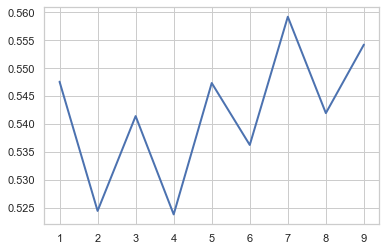

In [76]:
# visual the result of finding best K
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [77]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

The best n_neighbors was  :  7
The best accuracy was with: 0.56


In [78]:
# using the best K (5) to model
#neigh = KNeighborsClassifier(n_neighbors = grid_results.best_params_.get('n_neighbors')).fit(X_train,y_train)
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [79]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

KNN Accuracy     : 0.54
KNN Jaccard index: 0.49
KNN F1-score     : 0.48


[[72724  9155]
 [66331 15548]]
              precision    recall  f1-score   support

           1       0.52      0.89      0.66     81879
           2       0.63      0.19      0.29     81879

    accuracy                           0.54    163758
   macro avg       0.58      0.54      0.48    163758
weighted avg       0.58      0.54      0.48    163758



c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


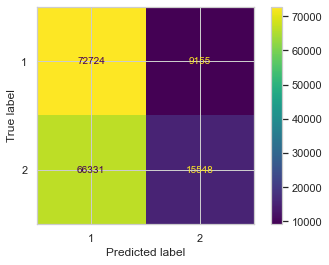

In [80]:
# Train data result: Confusion Matrix and report
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()  

[[48327  6279]
 [19121  4143]]
              precision    recall  f1-score   support

           1       0.72      0.89      0.79     54606
           2       0.40      0.18      0.25     23264

    accuracy                           0.67     77870
   macro avg       0.56      0.53      0.52     77870
weighted avg       0.62      0.67      0.63     77870



c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


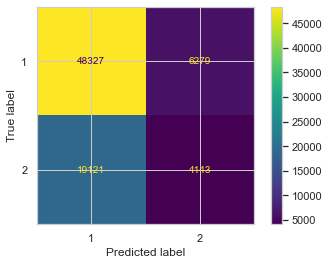

In [81]:
# Test dataset result
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show() 

## Decision Tree

     ---------------------------------------- 47.0/47.0 KB 2.3 MB/s eta 0:00:00


c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The best tree_depth was:  17
The best accuracy was  :  0.6263510790312534


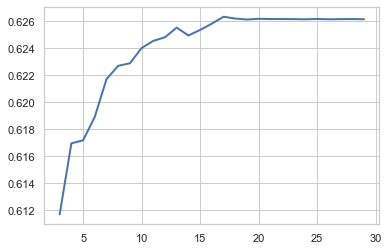

In [84]:
!pip3 install graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg

# Find the best para
tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

#plot the result of finding best para
sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [85]:
# using the best result
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [86]:
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

loanTree Jaccard index: 0.44
loanTree F1-score     : 0.64


[[46803 35076]
 [24122 57757]]
              precision    recall  f1-score   support

           1       0.66      0.57      0.61     81879
           2       0.62      0.71      0.66     81879

    accuracy                           0.64    163758
   macro avg       0.64      0.64      0.64    163758
weighted avg       0.64      0.64      0.64    163758



c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


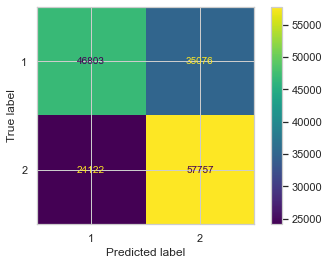

In [87]:
# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()  

In [88]:
# # Confusion Matrix and report - Train data
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

[[30586 24020]
 [ 7689 15575]]
              precision    recall  f1-score   support

           1       0.80      0.56      0.66     54606
           2       0.39      0.67      0.50     23264

    accuracy                           0.59     77870
   macro avg       0.60      0.61      0.58     77870
weighted avg       0.68      0.59      0.61     77870



c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


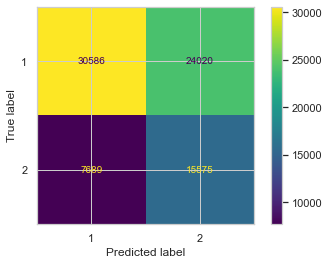

In [89]:
# Visualize the result
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show() 

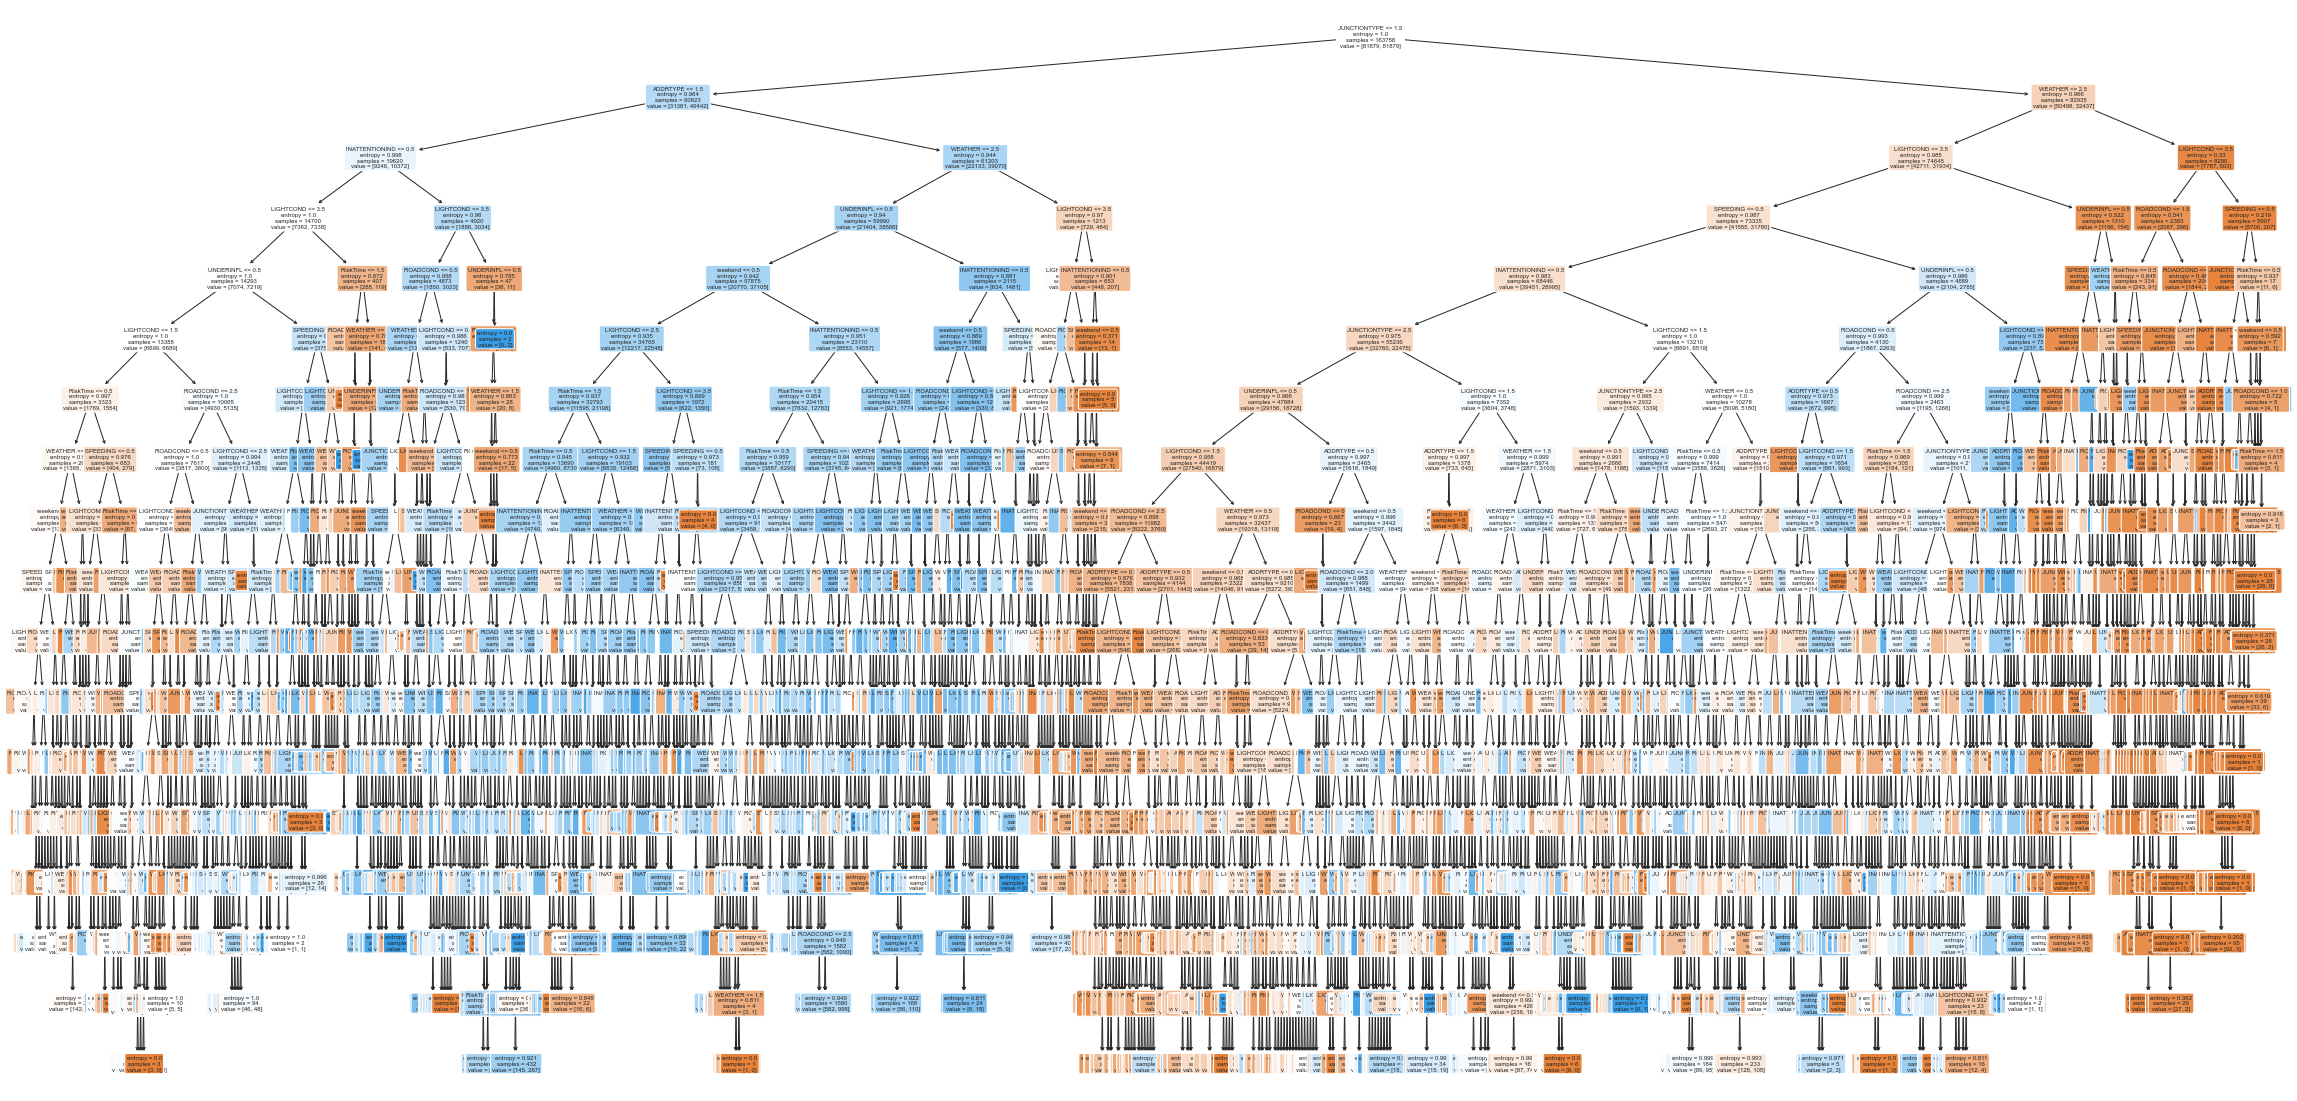

<Figure size 432x288 with 0 Axes>

In [92]:
# Visualize Decision Tree
!pip3 install pydot
#!pip3 install graphviz
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
from six import StringIO

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]

from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(carTree, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()
plt.savefig('filename.png')


## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best para
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_) # {'C': 0.001, 'penalty': 'l2'}
print("The best accuracy was : ",LR_grid.best_score_)

c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\yogesh baisla\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\yogesh baisl

The best parameter was:  {'C': 0.01, 'penalty': 'l2'}
The best accuracy was :  0.6136738357820687
